In [122]:
import tabint
from tabint.visual import *
from tabint.pre_processing import *

In [12]:
file_path = '/media/zero/dropbox/Dropbox/Data science project/Kaggle/home_credit_default_risk/data/'
app_train = pd.read_csv(file_path + 'application_train.csv')

In [6]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# box plot

In [112]:
class BoxnWhisker(BaseViz):
    def __init__(self, features, values, result):
        self.features, self.values = features, values
        self.result = result
        
    @classmethod
    def from_df(cls, df, features = None):
        values = df.values.T if features is None else df[to_iter(features)].values.T
        features = features or df.columns        
        return cls.from_series(features, values)
    
    @classmethod
    def from_series(cls, features, values):
        result = pd.DataFrame(columns=['Feature', 'Min', 'Q1', 'Median', 'Q3', 'Max'])
        for f, v in zip(features, values): 
            Min, Q1, Median, Q3, Max = cls.calculate(v)
            result = df_append(result, f, Min, Q1, Median, Q3, Max)
        return cls(to_iter(features), to_iter(values), result)        
    
    @staticmethod
    def calculate(values):
        Median = np.median(values)
        Q1, Q3 = np.percentile(values, [25,75])
        IQR = Q3 - Q1
        Min, Max = Q1 - IQR*1.5, Q3 + IQR*1.5
        return Min, Q1, Median, Q3, Max

    def plot(self, orient = 'h', **kwarg): 
        for f, v in zip(self.features, self.values): plot_boxnwhisker(f, v, orient = orient, **kwarg)

In [113]:
def plot_boxnwhisker(feature, value, orient = 'h', **kwarg):
    plt.figure()
    sns.boxplot(data = value, orient = orient, **kwarg).set(ylabel=feature)

In [114]:
bw = BoxnWhisker.from_df(app_train, ['CNT_CHILDREN', 'AMT_INCOME_TOTAL'])

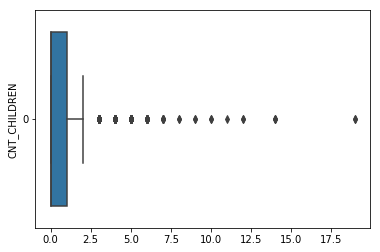

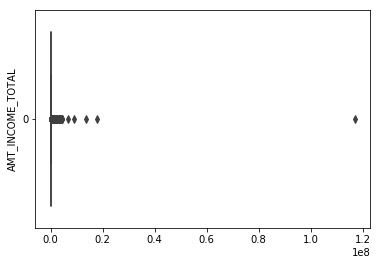

In [115]:
bw.plot()

In [116]:
bw.result

,Feature,Min,Q1,Median,Q3,Max
0,CNT_CHILDREN,-1.5,0.0,0.0,1.0,2.5
1,AMT_INCOME_TOTAL,-22500.0,112500.0,147150.0,202500.0,337500.0


# remove outlier

In [154]:
def boxnwhisker_value(values):
    Median = np.median(values)
    Q1, Q3 = np.percentile(values, [25,75])
    IQR = Q3 - Q1
    Min, Max = Q1 - IQR*1.5, Q3 + IQR*1.5
    return Min, Q1, Median, Q3, Max, IQR

In [155]:
class TBPreProc:
    def __init__(self, *args): self.args = args
        
    def __call__(self, df, pp_outp): return self.func(df, pp_outp, *self.args)
    
    @staticmethod
    def func(*args): None

In [156]:
#need to do
class remove_outlier(TBPreProc):
    @staticmethod
    def func(df, pp_outp):
        return filter_outlier(df, pp_outp['cons'])[0]

In [153]:
def filter_outlier(df, cons):
    filt =  np.full(df.shape[0], True)
    for f, v in df[cons].items():
        Min, _, _, _, Max, _ = boxnwhisker_value(v)
        inlier = np.logical_and(v.values >= Min, v.values <= Max)
        pdb.set_trace()
        filt = np.logical_and(filt, inlier)
    return df[filt], filt

In [151]:
app_train.shape

(307511, 122)

In [152]:
app_train_proc.shape

(28054, 330)